# Análise preliminar

Aqui procuramos, a partir dos dados já tratados disponibilizados pelos autores, reproduzir a análise exploratória apresentada

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
# checando tipo de encoding
# !file -I ../data/dados_brutos/sinistros/sinistros_2015-2021.csv

# checando erro na linha 928, vê-se que o delimitador é ';'
# with open("../data/dados_brutos/sinistros/sinistros_2015-2021.csv", encoding="iso-8859-1") as f:
#     for i, line in enumerate(f, 1):
#         if i == 928:
#             print(line)
#             break

df_sinistros_1521 = pd.read_csv("../data/dados_brutos/sinistros/sinistros_2015-2021.csv", encoding="iso-8859-1", sep=';')
df_sinistros_1521.head()

,id_sinistro,tipo_registro,data_sinistro,ano_sinistro,mes_sinistro,dia_sinistro,ano_mes_sinistro,hora_sinistro,logradouro,numero_logradouro,...,tp_sinistro_colisao_traseira,tp_sinistro_colisao_lateral,tp_sinistro_colisao_transversal,tp_sinistro_colisao_outros,tp_sinistro_choque,tp_sinistro_capotamento,tp_sinistro_engavetamento,tp_sinistro_tombamento,tp_sinistro_outros,tp_sinistro_nao_disponivel
0,2501575,SINISTRO FATAL,21/12/2014,2014,12,21,2014/12,20:00,RUA MANOEL MACHADO PEREIRA,905.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2456933,SINISTRO FATAL,23/12/2014,2014,12,23,2014/12,NaN,AVENIDA VINTE E TRES,1000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S
2,2463759,SINISTRO FATAL,26/12/2014,2014,12,26,2014/12,06:52,AVENIDA REBOUCAS,300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2487781,SINISTRO FATAL,28/12/2014,2014,12,28,2014/12,14:30,ESTRADA EGÍLIO VITORELLO,589.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2489730,SINISTRO FATAL,28/12/2014,2014,12,28,2014/12,NaN,AVENIDA SAO PAULO,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S


In [45]:
df_sinistros_2225 = pd.read_csv("../data/dados_brutos/sinistros/sinistros_2022-2025.csv", encoding="iso-8859-1", sep=';')

df_sinistros_2225['tp_veiculo_nao_disponivel'].head()
df_sinistros_2225.columns

Index(['id_sinistro', 'tipo_registro', 'data_sinistro', 'ano_sinistro',
       'mes_sinistro', 'dia_sinistro', 'ano_mes_sinistro', 'hora_sinistro',
       'logradouro', 'numero_logradouro', 'tipo_via', 'latitude', 'longitude',
       'municipio', 'regiao_administrativa', 'tp_veiculo_bicicleta',
       'tp_veiculo_caminhao', 'tp_veiculo_motocicleta',
       'tp_veiculo_nao_disponivel', 'tp_veiculo_onibus', 'tp_veiculo_outros',
       'tp_veiculo_automovel', 'gravidade_nao_disponivel', 'gravidade_leve',
       'gravidade_fatal', 'gravidade_ileso', 'gravidade_grave',
       'administracao', 'conservacao', 'jurisdicao', 'tipo_acidente_primario',
       'tp_sinistro_atropelamento', 'tp_sinistro_colisao_frontal',
       'tp_sinistro_colisao_traseira', 'tp_sinistro_colisao_lateral',
       'tp_sinistro_colisao_transversal', 'tp_sinistro_colisao_outros',
       'tp_sinistro_choque', 'tp_sinistro_capotamento',
       'tp_sinistro_engavetamento', 'tp_sinistro_tombamento',
       'tp_sinistro_out

In [32]:
df_sinistros = pd.concat([df_sinistros_1521, df_sinistros_2225], ignor_index=True)
df_sinistros.head()

TypeError: concat() got an unexpected keyword argument 'ignor_index'

In [46]:
# criar coluna de tipo de transporte

def tipo_transporte(row):
    if row['tp_veiculo_motocicleta'] == 1:
        return 'Motocicleta'
    elif row['tp_veiculo_nao_disponivel'] == 1:
        return 'Não disponível'
    else:
        return 'Outros'
    
df_sinistros['tipo_de_transporte'] = df_sinistros.apply(tipo_transporte, axis=1)

In [49]:
df_sinistros['tipo_de_transporte'].unique()

array(['Não disponível', 'Outros', 'Motocicleta'], dtype=object)

In [ ]:
df_sinistros.shape[0] == df_sinistros_1521.shape[0] + df_sinistros_2225.shape[0]

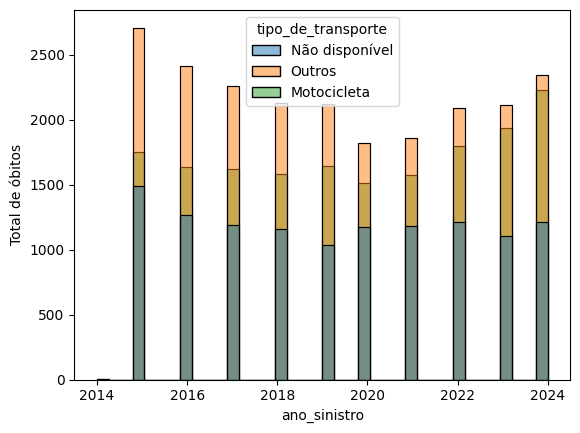

In [47]:
sns.histplot(data=df_sinistros.query("tipo_registro == 'SINISTRO FATAL' and ano_sinistro < 2025"), 
             x='ano_sinistro', hue='tipo_de_transporte')
plt.ylabel('Total de óbitos')
plt.show()